In [11]:
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt
import cv2

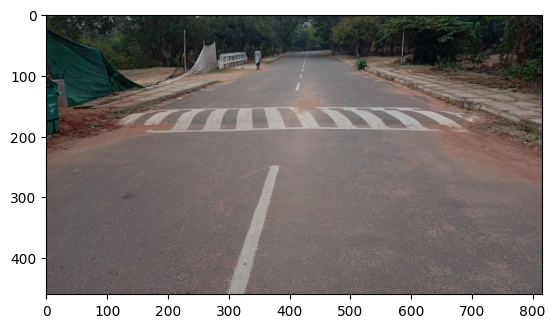

In [29]:
image1=Image.open(r'C:\Users\LENOVO\Documents\Python Scripts\Pathole_and_humps_detection\Datasets\Humps\image00100.jpg')
plt.imshow(image1)
plt.show()

In [33]:
# number=0
# trains['label']=0
# for i in class_names:
#     trains['label']=trains['label'] + trains[i] * number
#     number=number+1

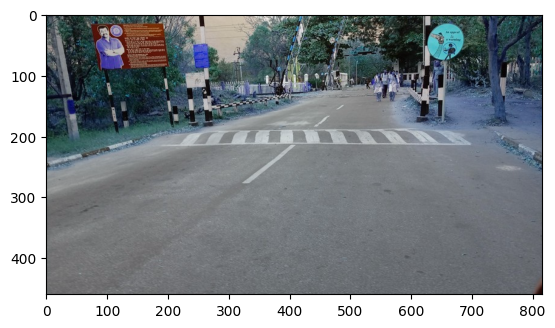

In [52]:
Train_DIR=r'C:\Users\LENOVO\Documents\Python Scripts\Pathole_and_humps_detection\Datasets\humps\Image00006.jpg'
old_image=cv2.imread(Train_DIR,cv2.COLOR_BGR2RGB)
plt.imshow(old_image)
plt.show()

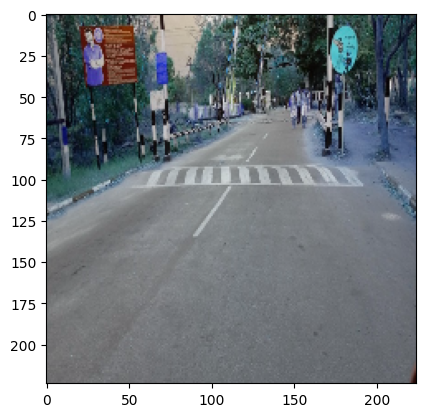

In [54]:
IMG_SIZE=224
new_image=cv2.resize(old_image,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_image)
plt.show()

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Activation,Flatten, Conv2D, MaxPooling2D

In [3]:
IMG_SIZE=224
datagen=ImageDataGenerator(rescale=1./255,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                vertical_flip=True,
                                validation_split=0.2)


train_datagen=datagen.flow_from_directory(r'C:\Users\LENOVO\Documents\Python Scripts\Pathole_and_humps_detection\Datasets\Train',
                                         target_size=(IMG_SIZE,IMG_SIZE),
                                         batch_size=16,
                                         class_mode='categorical',
                                         subset='training')

val_datagen=datagen.flow_from_directory(r'C:\Users\LENOVO\Documents\Python Scripts\Pathole_and_humps_detection\Datasets\Train',
                                         target_size=(IMG_SIZE,IMG_SIZE),
                                         batch_size=16,
                                         class_mode='categorical',
                                         subset='validation')

Found 787 images belonging to 3 classes.
Found 195 images belonging to 3 classes.


In [4]:
model=Sequential()
model.add(Conv2D(64,(3,3),activation='relu',padding='same',input_shape=(IMG_SIZE,IMG_SIZE,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(3, activation='softmax')) 

# Compile the Model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 64)       0

In [5]:
checkpoint=ModelCheckpoint(r'C:\Users\LENOVO\Documents\Python Scripts\Pathole_and_humps_detection\models\second.h5',
                          monitor='val_loss',
                          mode='min',
                          save_best_only=True,
                          verbose=1)
earlystop=EarlyStopping(monitor='val_loss',
                       min_delta=0,
                       patience=10,
                       verbose=1,
                       restore_best_weights=True)

callbacks=[checkpoint,earlystop]

In [6]:
model_history=model.fit_generator(train_datagen,validation_data=val_datagen,
                                 epochs=50,
                                 steps_per_epoch=train_datagen.samples//16,
                                 validation_steps=val_datagen.samples//16,
                                 callbacks=callbacks)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_16428\934003385.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model_history=model.fit_generator(train_datagen,validation_data=val_datagen,


Epoch 1/50
49/49 [==============================] - ETA: 0s - loss: 1.0131 - accuracy: 0.5253
Epoch 1: val_loss improved from inf to 0.96988, saving model to C:\Users\LENOVO\Documents\Python Scripts\Pathole_and_humps_detection\models\second.h5
49/49 [==============================] - 64s 1s/step - loss: 1.0131 - accuracy: 0.5253 - val_loss: 0.9699 - val_accuracy: 0.6510
Epoch 2/50
49/49 [==============================] - ETA: 0s - loss: 0.7321 - accuracy: 0.7095
Epoch 2: val_loss improved from 0.96988 to 0.64277, saving model to C:\Users\LENOVO\Documents\Python Scripts\Pathole_and_humps_detection\models\second.h5
49/49 [==============================] - 53s 1s/step - loss: 0.7321 - accuracy: 0.7095 - val_loss: 0.6428 - val_accuracy: 0.7708
Epoch 3/50
49/49 [==============================] - ETA: 0s - loss: 0.5795 - accuracy: 0.7639
Epoch 3: val_loss improved from 0.64277 to 0.60177, saving model to C:\Users\LENOVO\Documents\Python Scripts\Pathole_and_humps_detection\models\second.h5
49

In [7]:
from tensorflow import keras
model = keras.models.load_model(r'C:\Users\LENOVO\Documents\Python Scripts\Pathole_and_humps_detection\models\second.h5')

1/1 [==============================] - 0s 35ms/step
2


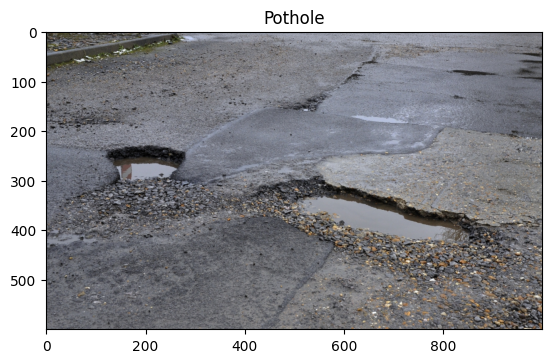

In [13]:
test_image=r'C:\Users\LENOVO\Documents\Python Scripts\Pathole_and_humps_detection\Datasets\Test\2.jpg'
image_result=Image.open(test_image)

from tensorflow.keras.preprocessing import image
test_image=image.load_img(test_image,target_size=(224,224))
test_image=image.img_to_array(test_image)
test_image=test_image/255
test_image=np.expand_dims(test_image,axis=0)
result=model.predict(test_image)
print(np.argmax(result))
Categories=['Humps','normal','Pothole']
image_result=plt.imshow(image_result)
plt.title(Categories[np.argmax(result)])
plt.show()